#### Reading data 
Naji sent me a text file That I processed with python codes to generate dataframes


In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.tree import DecisionTreeRegressor

from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score,confusion_matrix,roc_auc_score, r2_score
def model_evaluation(model_name,Y_test,Y_pred):
    try:
        acc=round(accuracy_score(Y_test,Y_pred)*100,2)
        precision=round(precision_score(Y_test,Y_pred) *100,2)
        recall=round(recall_score(Y_test,Y_pred) *100,2)
        f1=round(f1_score(Y_test,Y_pred) *100,2)
    except:
        acc="-"
        precision="-" 
        recall="-"
        f1="-"
    auc_score=round(roc_auc_score(Y_test,Y_pred)*100,2)
    
    
    
    evaluation={'accuracy': acc,
               'recall': recall,
               'precision': precision,
               'F1 score': f1,
               'auc score': auc_score,              
                }
    df_eval = pd.DataFrame.from_dict(evaluation,orient='index',columns=[model_name])
    return df_eval


pd.set_option('display.max_columns', 20)
pd.set_option('display.max_rows', 40)

In [10]:
#!/bin/python
#
import re

structure_text_file='structures.txt'
samples=dict()

with open(structure_text_file,'r') as fh:
    lines =fh.readlines()    

# another comment 

#### Creating Python Dictionary
from data already read off the text file

In [11]:
name=''
count=0
for line in lines:
    
    if line.startswith('/'):
        count=count+1
        name=line.split('/')[-1].strip().split('.')[0].strip()
        samples[count]=dict()
        samples[count]['name']=name
        
    else:
        key,value=line.split("=")
        samples[count][key]=value.strip()
        
        

##  Data preprocessing
1. Removing likely unrelated data.
2. Re-ordering independent and result parameter

In [12]:

df1=pd.DataFrame.from_dict(samples,orient='index')
# df1.to_csv('structures1.csv')
df1.reset_index(drop=True, inplace=True)
df1=df1.drop(['name','Box volume ','Strain ','Displacement (x & y) ','Displacement (z) '],axis=1) # removing  unrelated data
df1['id'] = range(1, len(df1) + 1)
df1.head()



,Mesh volume,Rho,C11,C22,C33,C12,C13,C23,C44,C55,...,E1,E2,E3,nu12,nu13,nu23,mu23,mu13,mu12,id
0,345322.7689798011,0.043165346122475134,0.11035552355957358,0.09331165897852606,0.09504280902015454,0.05278984171587961,0.052062701007787655,0.048629559682231656,0.8232323361468934,0.0473408834742925,...,0.0718423758865318,0.06007298897043067,0.06221081931295994,0.38216439715640765,0.3522435310255481,0.34859099707052454,0.8232323361468934,0.0473408834742925,0.04888035506201445,1
1,357365.46845682024,0.044670683557102527,0.10617143949810734,0.09918641985748405,0.10736234663811096,0.049312284638048584,0.05328893997978546,0.04614831561875709,0.08628384612909565,0.22490776562387066,...,0.07093383220596787,0.07060329226099511,0.07461367605320639,0.3327872571460019,0.3533023428685621,0.28050572845183924,0.08628384612909565,0.22490776562387066,0.39394490995706727,2
2,360372.69797348813,0.04504658724668602,0.07193354729955323,0.08929505164845775,0.07828078474646538,0.0458720520574417,0.0318038593428175,0.03450355632019318,0.03694857299425585,0.400647691389732,...,0.04531657511011215,0.05689272910555098,0.06085058599165685,0.42995339569785185,0.21677015878490621,0.23686955147974376,0.03694857299425585,0.400647691389732,0.4130484399163377,3
3,345322.7689798011,0.043165346122475134,0.11361766771302749,0.0938024670913367,0.0955587273541434,0.052272525096486507,0.05042781240763302,0.04772399864538084,0.8232323361468934,0.0473408834742925,...,0.0765192029683098,0.0615347949933416,0.06455512431582351,0.38714541089421395,0.3343670036975093,0.35157473622316593,0.8232323361468934,0.0473408834742925,0.04888035506201445,4
4,357365.46845682024,0.044670683557102527,0.10617143949810734,0.09918641985748405,0.10736234663811096,0.049312284638048584,0.05328893997978546,0.04614831561875709,0.08628384612909565,0.22490776562387066,...,0.07093383220596787,0.07060329226099511,0.07461367605320639,0.3327872571460019,0.3533023428685621,0.28050572845183924,0.08628384612909565,0.22490776562387066,0.39394490995706727,5


#### Aspect Ratio Data from xlsx

reading the text file AR_per_structure.xlsx sent by Naji


In [13]:
# ! pip install openpyxl
df2=pd.read_excel('AR_per_structure.xlsx')
df2=df2.dropna(axis=1,how='all')
df2=df2.dropna(axis=0,how='all')
df2.columns = df2.iloc[0]
df2 = df2[1:]
df2['id'] = range(1, len(df2) + 1)
df2 = df2.loc[:, df2.columns.notna()]
df2.reset_index(drop=True, inplace=True)
df2 = df2.rename_axis(None, axis=1)


#### Creating the dataframe for analysis from originals 

In [16]:
# df = df1[['Mesh volume ', 'Rho ', 'C11 ', 'C22 ', 'C33 ', 'C12 ', 'C13 ', 'C23 ', 'C44 ', 'C55 ', 'C66 ', 'nu12 ', 'nu13 ', 'nu23 ','mu23 ', 'mu13 ', 'mu12 ', 'E1 ', 'E2 ', 'E3 ']]
#df = df1[[ 'C22 ', 'C33 ', 'nu12 ', 'nu13 ', 'nu23 ','mu23 ', 'mu13 ', 'mu12 ', 'E1 ']]
df1= df1[['Mesh volume ', 'Rho ', 'C11 ',  'E1 ','E2 ']]
df_input=pd.concat([df1,df2],axis=1)
# df_input = df_input[['Mesh volume ', 'a','b', 'Rho ','E1 ']]
df = df_input
df['E1 ']=pd.to_numeric(df["E1 "])
df['C11 ']=pd.to_numeric(df["C11 "])
df['E'] = round(100 * df['E1 '] )
for col in df.columns:
    df[col]=pd.to_numeric(df[col])

df.head()

,Mesh volume,Rho,C11,E1,E2,a,b,AR,id,E
0,345322.768980,0.043165,0.110356,0.071842,0.060073,13.840443,0.241912,3.348169,1,7.0
1,357365.468457,0.044671,0.106171,0.070934,0.070603,14.079122,0.235956,3.322047,2,7.0
2,360372.697973,0.045047,0.071934,0.045317,0.056893,13.869349,0.244432,3.390113,3,5.0
3,345322.768980,0.043165,0.113618,0.076519,0.061535,15.818883,0.213780,3.381758,4,8.0
4,357365.468457,0.044671,0.106171,0.070934,0.070603,13.677275,0.244578,3.345158,5,7.0


#### Data Analysis

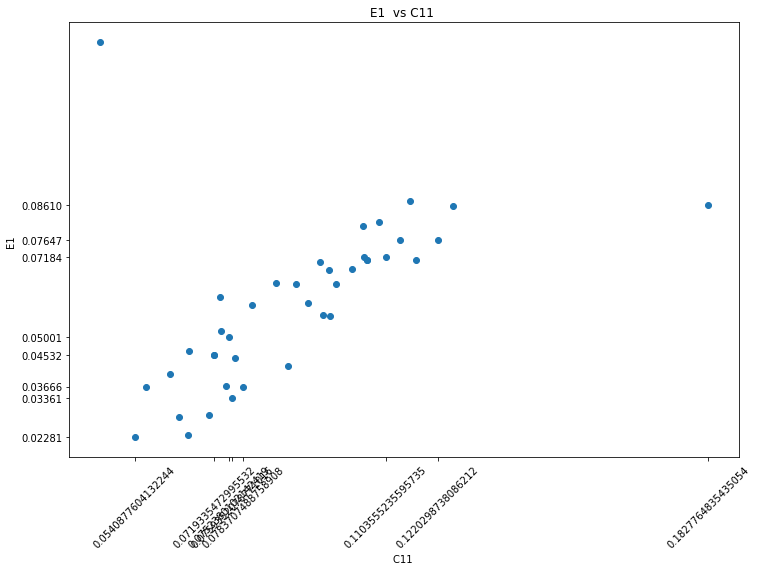

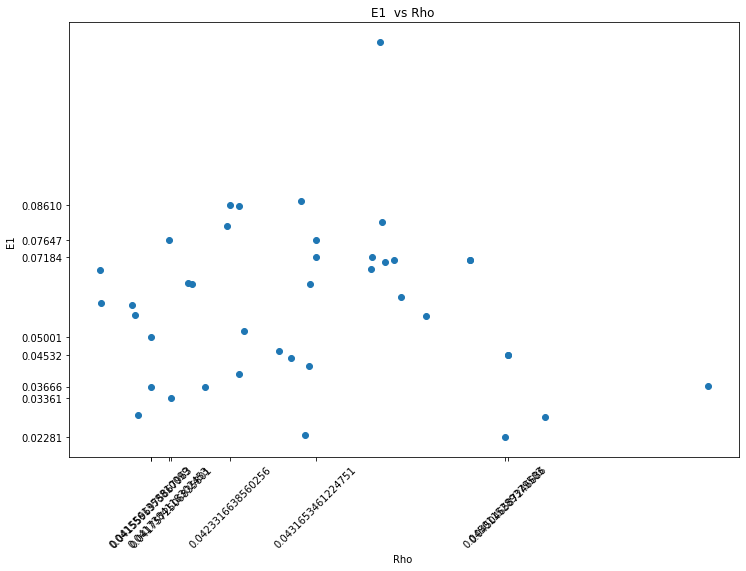

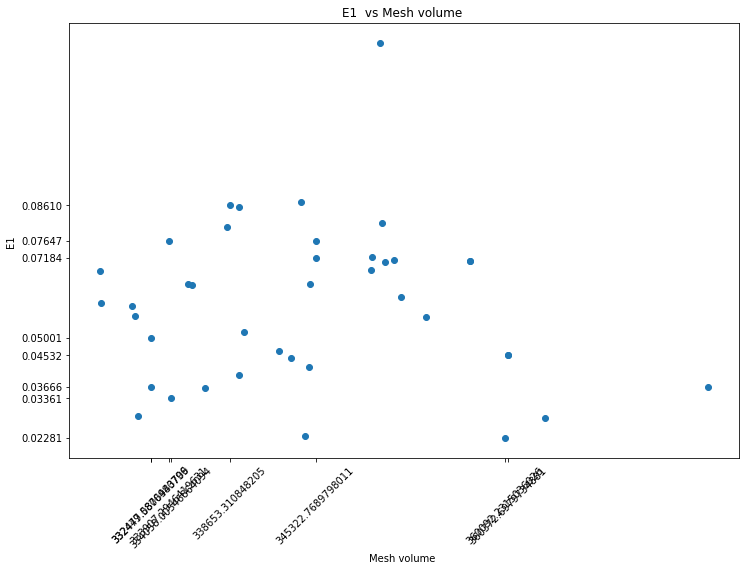

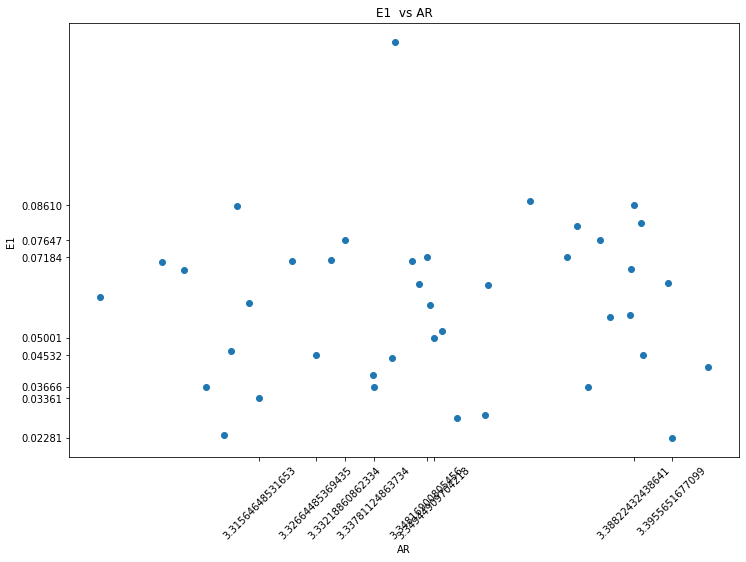

In [ ]:
def feature_plot(col_x,col_y):
    plt.rcParams['figure.figsize'] = [12, 8]
    fig, axs = plt.subplots()
    
    axs.scatter(df[col_x],df[col_y])
    axs.set_xlabel(col_x)
    axs.set_ylabel(col_y)
    axs.title.set_text(col_y+' vs '+col_x)
    axs.set_xticks(np.array(df[col_x])[0::5])
    axs.set_xticklabels(np.array(df[col_x])[0::5],rotation=45)
    plt.rcParams['figure.figsize'] = [8, 8]
    plt.yticks(np.array(df[col_y])[0::5])
    plt.show()

feature_plot('C11 ','E1 ')
feature_plot('Rho ','E1 ')
feature_plot('Mesh volume ','E1 ')
feature_plot('AR','E1 ')

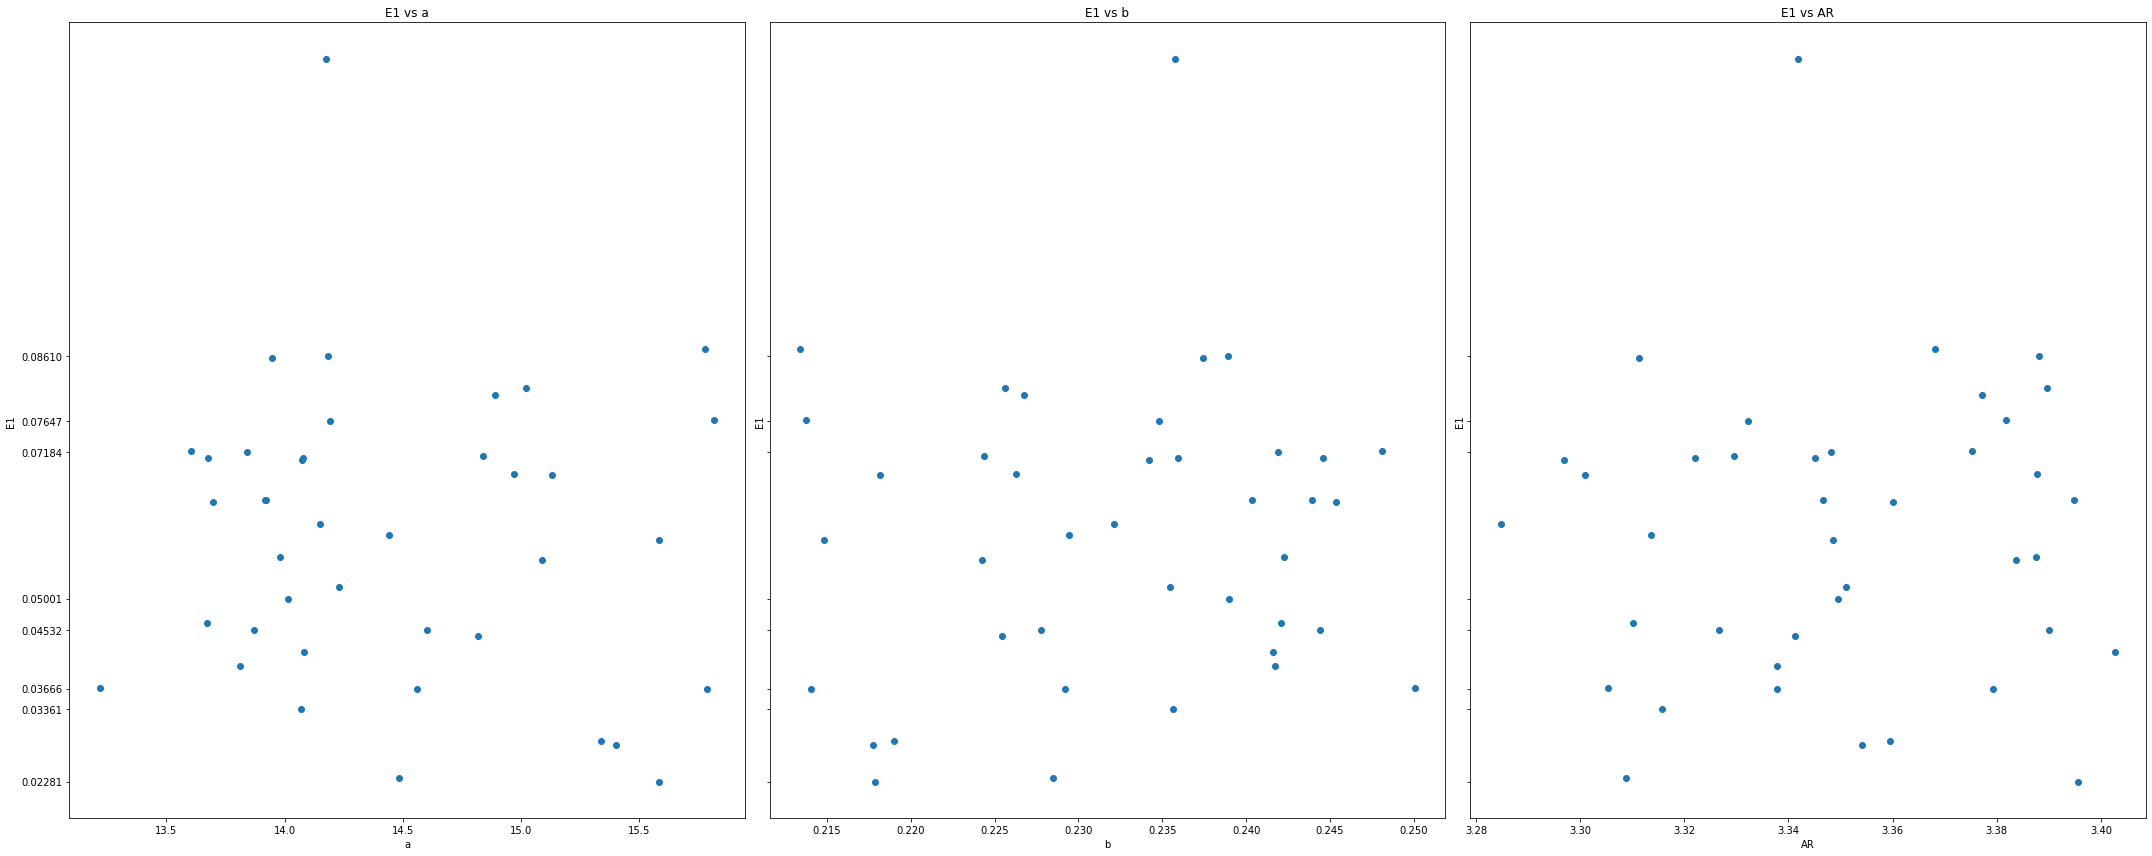

In [ ]:
plt.rcParams['figure.figsize'] = [30, 12]
fig, axs = plt.subplots(1, 3, sharey=True, tight_layout=True)
axs[0].scatter(df['a'],df['E1 '])
axs[0].set_xlabel('a')
axs[0].set_ylabel('E1 ')
axs[0].title.set_text('E1 vs a')


axs[1].scatter(df['b'],df['E1 '])
axs[1].set_xlabel('b')
axs[1].set_ylabel('E1 ')
axs[1].title.set_text('E1 vs b')

axs[2].scatter(df['AR'],df['E1 '])
axs[2].set_xlabel('AR')
axs[2].set_ylabel('E1 ')
axs[2].title.set_text('E1 vs AR')

plt.yticks(np.array(df['E1 '])[0::5])



plt.show()

In [ ]:
df.describe()

,Mesh volume,Rho,C11,E1,E2,a,b,AR,id,E
count,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000
mean,344624.204573,0.043078,0.090125,0.059137,0.054746,14.464141,0.232058,3.349512,20.500000,5.950000
std,10980.869369,0.001373,0.025148,0.021595,0.034715,0.697264,0.010547,0.032254,11.690452,2.194983
min,328475.871415,0.041059,0.046281,0.022811,-0.126489,13.218859,0.213423,3.284717,1.000000,2.000000
25%,335602.594914,0.041950,0.072993,0.043885,0.044062,13.940152,0.225175,3.325496,10.750000,4.000000
50%,344346.454911,0.043043,0.089377,0.060266,0.059653,14.187104,0.234509,3.348408,20.500000,6.000000
75%,350910.423246,0.043864,0.105707,0.071335,0.069358,14.983689,0.241644,3.379904,30.250000,7.000000
max,375994.168034,0.046999,0.182776,0.130306,0.106966,15.818883,0.250039,3.402712,40.000000,13.000000


#### Outliers
Let us do a box plot to find out outliers


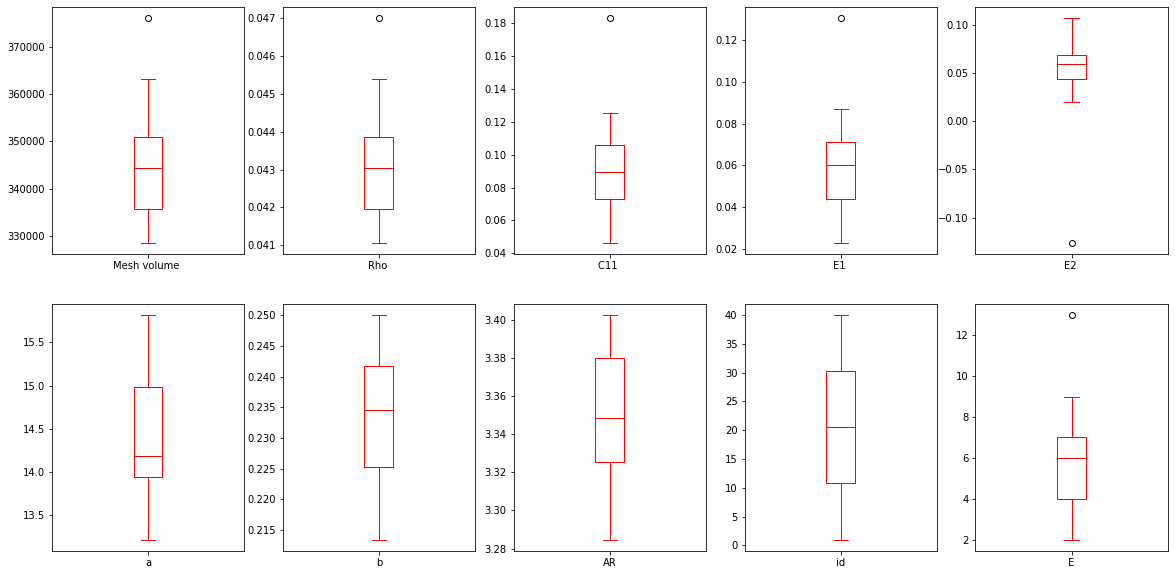

In [ ]:
df.plot(kind='box', subplots=True, layout=(2,5),sharex=False,sharey=False, figsize=(20, 10), color='red');

In [ ]:
def find_outliers(df, col_name):
    Q1 = df[col_name].quantile(0.25)
    Q3 = df[col_name].quantile(0.75)
    IQR = Q3-Q1
    low  = Q1-1.5*IQR
    high = Q3+1.5*IQR
    outlier_list=((df[col_name] < low) | (df[col_name] > high)).tolist()
    i_outlier=[i for i, x in enumerate(outlier_list) if x]
    return i_outlier
set_i_bad=set()    
for col_name in ['Mesh volume ','Rho ','C11 ','E1 ','E']:
    i_outlier =find_outliers(df,col_name )
    # print(f"{col_name}:{i_outlier}")
    for i in i_outlier:
        set_i_bad.add(i)


df.drop(set_i_bad,inplace=True)
df.shape

(37, 10)

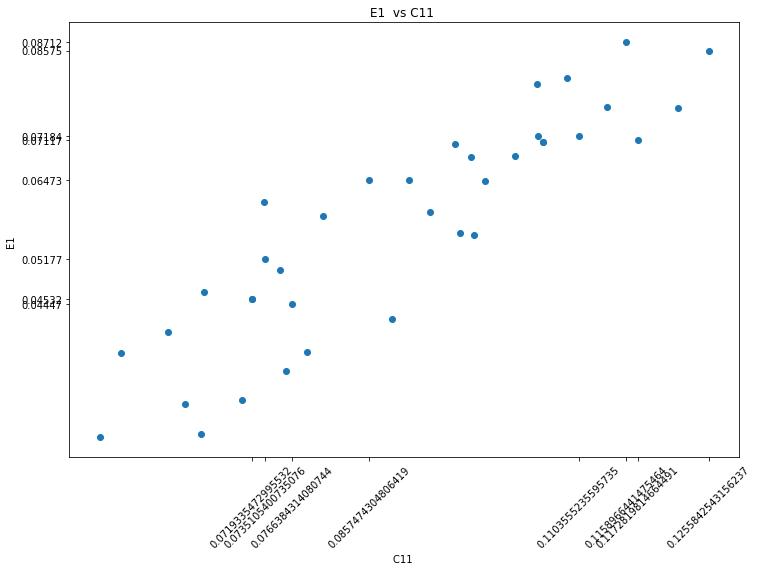

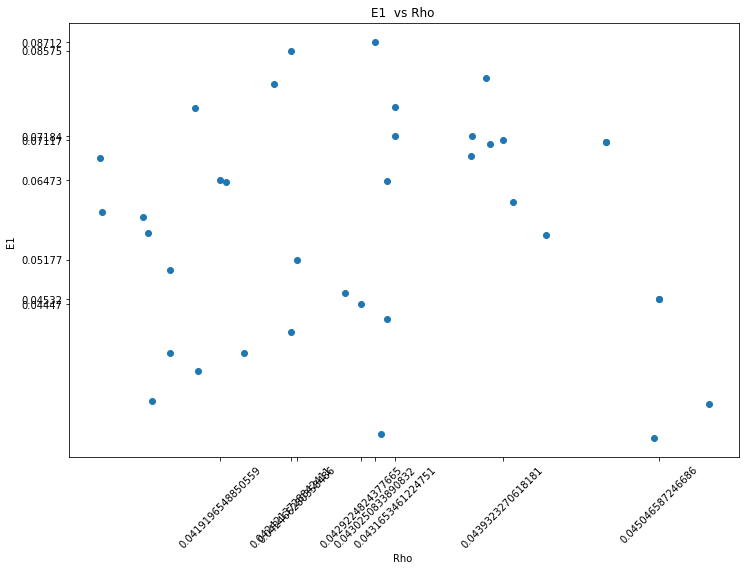

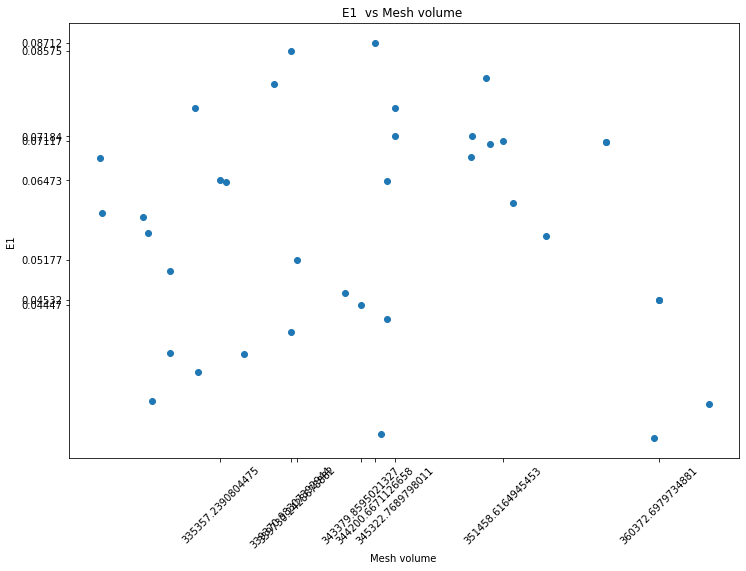

In [ ]:
plt.rcParams['figure.figsize'] = [12, 8]
feature_plot('C11 ','E1 ')
feature_plot('Rho ','E1 ')
feature_plot('Mesh volume ','E1 ')

#### Data Preprocessing for Regression Model 

Assume E1 to be the result.
All rows left of it to be components that is analyzed

https://towardsdatascience.com/understanding-feature-importance-and-how-to-implement-it-in-python-ff0287b20285

In [ ]:
X=df[['Mesh volume ', 'Rho ','C11 ','a', 'b', 'AR']]
y=df['E1 ']




#### Data preprocessing for Classification Model

In [ ]:
df.loc[df.E < 5, 'E'] =0
df.loc[df.E >= 5, 'E'] =1
yc=df['E']

In [ ]:
col_names = list(X.columns)
s_scaler = StandardScaler() 
X_scaled= s_scaler.fit_transform(X) #Standardize features by removing the mean and scaling to unit variance.
X_scaled = pd.DataFrame(X_scaled, columns=col_names)   
X_scaled.describe().T
X_train, X_test, y_train,y_test = train_test_split(X_scaled,y,test_size=0.20,random_state=25) # test data =20%


#### Regression: Decision tree

In [ ]:
dtr = DecisionTreeRegressor()
# fit the model
dtr.fit(X_train, y_train)
dtr.score(X_test,y_test)

0.6866283597155747

#### Regression: Random Forest

In [ ]:
rfr = RandomForestRegressor(n_estimators=100)
rfr.fit(X_train, y_train)
rfr.score(X_test,y_test)

0.7337343583005378

#### Regression: Linear regression

In [ ]:
lr = LinearRegression()
# fit the model
lr.fit(X_train, y_train)
lr.score(X_test,y_test)

0.5981121720932718

#### Logistic regression
Should we do this? how? why linear regression looks like this

In [ ]:
# from sklearn.linear_model import LogisticRegression
# lgr = LogisticRegression(   random_state = 0,solver = 'liblinear',multi_class = 'auto')
# lgr.fit(X_train,y_train)
# lgr.score(X_test,y_test)

#### Plots with Regression

Tree based Regression Models


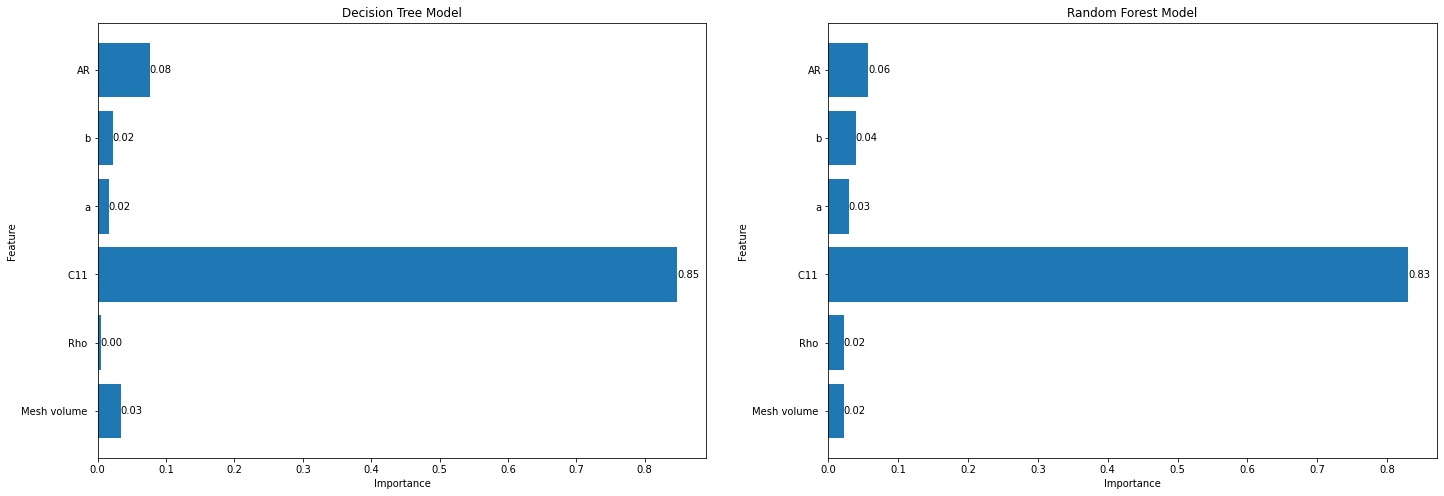

In [ ]:
plt.rcParams['figure.figsize'] = [24, 8]
fig, axs = plt.subplots(1, 2)


axs[0].title.set_text('Decision Tree Model')
hbars=axs[0].barh(X.columns, dtr.feature_importances_)
axs[0].set_xlabel('Importance')
axs[0].set_ylabel('Feature')
axs[0].bar_label(hbars,fmt='%.2f')


axs[1].title.set_text('Random Forest Model')
hbars=axs[1].barh(X.columns, rfr.feature_importances_)
axs[1].set_xlabel('Importance')
axs[1].set_ylabel('Feature')
axs[1].bar_label(hbars,fmt='%.2f')
plt.show()



Linear regression Models

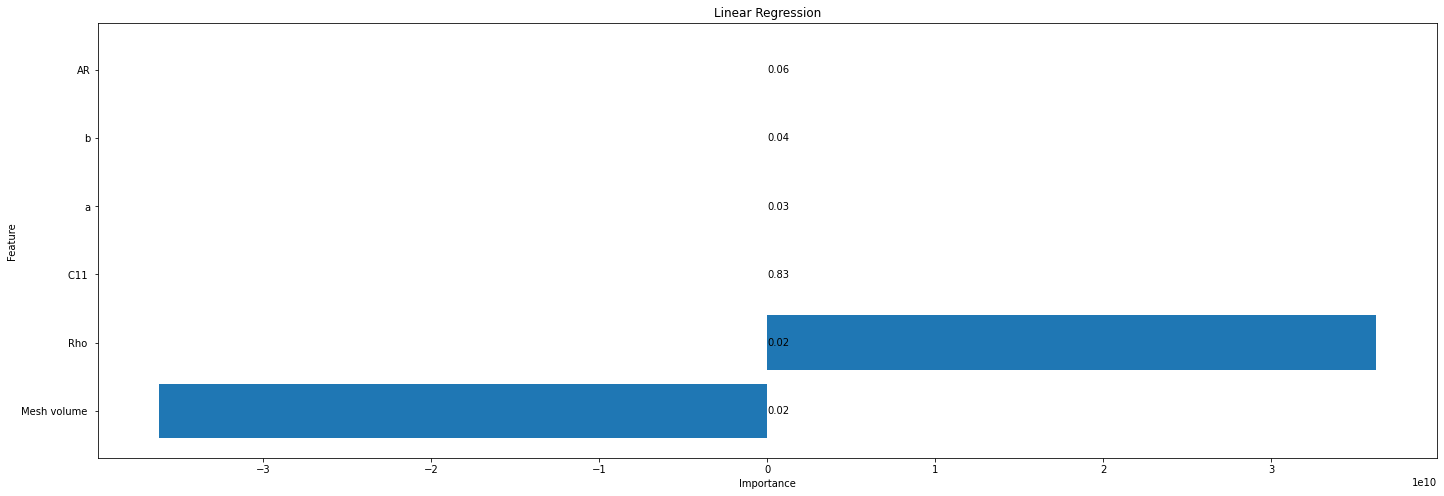

Index(['Mesh volume ', 'Rho ', 'C11 ', 'a', 'b', 'AR'], dtype='object')

In [ ]:
plt.rcParams['figure.figsize'] = [24, 8]
fig, axs = plt.subplots()

axs.title.set_text('Linear Regression')
axs.barh(X.columns, lr.coef_)
axs.set_xlabel('Importance')
axs.set_ylabel('Feature')
axs.bar_label(hbars,fmt='%.2f')



plt.show()
X.columns


#### Classification models
We catergorized the continuous variables.

In [ ]:
X_train, X_test, y_train,y_test = train_test_split(X_scaled,yc,test_size=0.20,random_state=25)

#### Decision Tree Classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier(criterion = 'entropy', random_state = 25)
dtc.fit(X_train, y_train)
y_pred = dtc.predict(X_test)
dtc_metrics=model_evaluation('dtc',y_test,y_pred)

#### Support Vector Machine Classifier

In [ ]:
from sklearn.svm import SVC
svm_model=SVC()
svm_model.fit (X_train, y_train)
y_pred = svm_model.predict(X_test)
svm_metrics = model_evaluation('SVM',y_test,y_pred)
svm_metrics

,SVM
accuracy,75.00
recall,100.00
precision,75.00
F1 score,85.71
auc score,50.00


#### Random FOrest  Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators = 100, criterion = 'entropy', random_state = 25)
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)
rfc_metrics = model_evaluation('RFC',y_test,y_pred)
rfc_metrics


,RFC
accuracy,75.00
recall,100.00
precision,75.00
F1 score,85.71
auc score,50.00


#### Logistic regression Classifier
We used the regresssor but used categorical result data.

In [ ]:
from sklearn.linear_model import LogisticRegression
logR = LogisticRegression(   random_state = 0,solver = 'liblinear',multi_class = 'auto')
logR.fit(X_train,y_train)
y_pred = logR.predict(X_test)
logisticr_metrics = model_evaluation('LogisticReg',y_test,y_pred)
logisticr_metrics

,LogisticReg
accuracy,87.50
recall,100.00
precision,85.71
F1 score,92.31
auc score,75.00


#### Linear Regression Classifier
Used a regressor with categorical result data

In [ ]:
from sklearn.linear_model import LinearRegression

linearr = LinearRegression()
linearr.fit(X_train,y_train)
y_pred = linearr.predict(X_test)


linnearr_metrics=model_evaluation('linnearr_metrics',y_test,y_pred)

#### Gaussian Naive bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred =gnb.predict(X_test)
nb_metrics = model_evaluation('Naive_Bayes',y_test,y_pred)

In [ ]:
linnearr_metrics.join(logisticr_metrics).join(svm_metrics).join(nb_metrics).join(dtc_metrics).join(rfc_metrics)

,linnearr_metrics,LogisticReg,SVM,Naive_Bayes,dtc,RFC
accuracy,-,87.50,75.00,87.50,75.00,75.00
recall,-,100.00,100.00,100.00,100.00,100.00
precision,-,85.71,75.00,85.71,75.00,75.00
F1 score,-,92.31,85.71,92.31,85.71,85.71
auc score,100.0,75.00,50.00,75.00,50.00,50.00
